# 1. Additional Functions

### 1.1 Import libraries 

In [2]:
import pickle
import os
import torch
import numpy as np

### 1.2 Functions

1.2.1 Set seed

In [3]:
def set_seed(seed_val=100):
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    return

1.2.2 Create folder

In [4]:
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return

1.2.3 Saving data as pickle

In [5]:
def save_pickle(data_to_store,data_filename):
    with open(data_filename, 'wb') as file:
        pickle.dump(data_to_store, file)
    return data_to_store

1.2.4 Loading data from pickle

In [6]:
def load_pickle(data_filename):
    with open(data_filename, 'rb') as file:
        data_loaded = pickle.load(file)
    return data_loaded

1.2.5 Setup device

In [7]:
def setup_device():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    return device

1.2.6 Save model

In [8]:
def save_model(nn_class,model_path):
    torch.save(nn_class.state_dict(), model_path)
    return nn_class

1.2.7 Load model

In [9]:
def load_model(nn_class,model_path,device=setup_device()):
    nn_class.load_state_dict(torch.load(model_path))
    nn_class = nn_class.to(device)
    return nn_class

# 2.

### 2.1 i)

2.1.1 Import libraries 

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

2.1.2 Import data 

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


2.1.3 Set parameters

In [12]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(class_names)
num_samples = 5

2.1.4 Select random samples

In [13]:
y_train_flattened = y_train.flatten()
x_train_hand_picked = []
for i in range(num_classes):
    current_class_indices = np.where(y_train_flattened==i)[0]
    hand_picked_indices = np.random.choice(current_class_indices,num_samples,replace=False)
    x_train_hand_picked.append(x_train[hand_picked_indices])

x_train_hand_picked = np.vstack(x_train_hand_picked)

In [14]:
x_train_hand_picked.shape

(50, 32, 32, 3)

2.1.5 Create plot

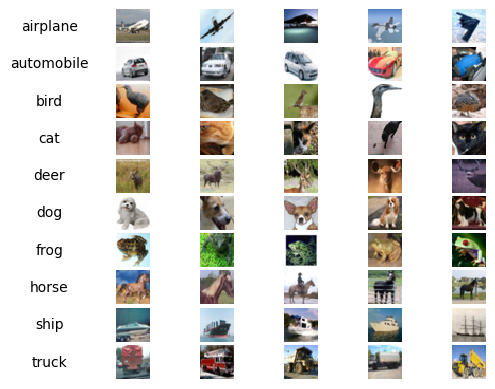

In [14]:
fig,axes = plt.subplots(num_classes,num_samples+1) 

for i in range(num_classes):
    current_class_name = class_names[i]
    axes[i,0].text(0.5,0.5,current_class_name,ha='center',va='center')
    axes[i,0].axis('off')

    for j in range(num_samples):
        img = x_train_hand_picked[i*5+j]
        axes[i,j + 1].imshow(img,interpolation='nearest')
        axes[i,j + 1].axis('off')

plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

### 2.2 ii)

2.2.1 Compute the mean and standard deviation across each RGB channel

In [15]:
mean = np.mean(x_train,axis=(0,1,2))
standard_deviation = np.std(x_train,axis=(0,1,2))

2.2.2 Normalize training and testing data

In [16]:
x_train_normalized = (x_train-mean)/standard_deviation
x_test_normalized = (x_test-mean)/standard_deviation

### 2.3 iii)

2.3.1 Set parameters

In [17]:
num_classes = len(np.unique(y_train))
num_images_per_class = int(x_train.shape[0]/num_classes)
training_proportion = 0.8

2.3.2 Split training data into training and validation

In [18]:
set_seed()
num_classes = len(np.unique(y_train))
num_images_per_class = int(x_train.shape[0]/num_classes)
training_proportion = 0.8

x_train_split = []
y_train_split = []
x_val_split = []
y_val_split = []

for i in range(num_classes):
    current_class_indices = np.where(y_train_flattened==i)[0]
    np.random.shuffle(current_class_indices)
    
    split_index = int(training_proportion*num_images_per_class)
    train_indices = current_class_indices[:split_index]
    val_indices = current_class_indices[split_index:]
    
    x_train_split.append(x_train[train_indices])
    y_train_split.append(y_train[train_indices])
    x_val_split.append(x_train[val_indices])
    y_val_split.append(y_train[val_indices])

x_train_split = np.concatenate(x_train_split)
y_train_split = np.concatenate(y_train_split)
x_val_split = np.concatenate(x_val_split)
y_val_split = np.concatenate(y_val_split)

In [20]:
print(x_train_split.shape) 
print(y_train_split.shape)
print(x_val_split.shape)
print(y_val_split.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)


# 3.

### 3.1 i) and ii) 

3.1.1 Import libraries

In [19]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
from PIL import Image

3.1.2 Set parameters

In [ ]:
set_seed()

batch_size = 256
num_classes = len(np.unique(y_train))

3.1.2 Set up GPU if available

In [21]:
device = setup_device()
print(device)

cpu


3.1.3 Create custom dataset

In [22]:
class CustomTensorDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = Image.fromarray(self.data[idx].astype(np.uint8))
        target = self.targets[idx]
        
        if self.transform:
            image = self.transform(image)
        
        image = torch.from_numpy(np.array(image)).permute(2, 0, 1).float()
        
        return image, target

3.1.4 Prepare training and validation data

In [23]:
transform = transforms.Compose([
    transforms.RandomApply([transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))], p=0.3),
    transforms.RandomApply([transforms.RandomRotation(15)], p=0.3),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))], p=0.1),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])

x_train_tensor = torch.tensor(x_train_split, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_split, dtype=torch.long).squeeze()

train_dataset = CustomTensorDataset(x_train_split, y_train_split, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

x_val_tensor = torch.tensor(x_val_split, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_split, dtype=torch.long).squeeze()

val_dataset = CustomTensorDataset(x_val_split, y_val_split)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

3.1.5 Define the model

In [24]:
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super().__init__()
        #Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3))
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3))
        
        #Max pool layer
        self.pool = nn.MaxPool2d(2, 2)
        
        #ReLU activation
        self.relu = nn.ReLU()
        
        #Softmax activation
        self.softmax = nn.Softmax()
        
        #Dense layers
        self.fc1 = nn.Linear(self._get_conv_output_size(), 512)
        self.fc2 = nn.Linear(512, num_classes)

    def _get_conv_output_size(self):
        with torch.no_grad():
            x = torch.zeros(1, 3, 32, 32)
            x = self.pool(self.relu(self.conv1(x)))
            x = self.pool(self.relu(self.conv2(x)))
            return x.numel()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x) #No softmax applied since using multi class cross entropy loss
        return x

### 3.2 iii) 

3.2.1 Set loss function

In [25]:
criterion = nn.CrossEntropyLoss()

### 3.3 iv)

3.3.1 Set parameters

In [26]:
epochs = 100
patience_num_epochs = 5

3.3.2 Send model to device

In [27]:
def send_model_to_device(nn_class):
    nn_class = nn_class.to(device)
    return nn_class

In [28]:
net = send_model_to_device(Net())

3.3.3 Set objective function

In [29]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

3.3.4 Train model

In [30]:
def train_model(nn_class,criterion,optimizer):
    best_val_loss = np.inf
    num_epochs_without_improvement = 0
    early_stopping = False

    epoch_list = []
    train_loss_list = []
    train_accuracy_list = []
    val_loss_list = []
    val_accuracy_list = []

    #Loop over the dataset multiple times
    for epoch in range(epochs):
        nn_class.eval()
        running_loss = 0.0
        train_correct = 0
        train_total = 0
        for i, data in enumerate(train_loader):
            #Get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            #Move the data to device
            inputs = inputs.to(device)
            labels = labels.to(device)

            if labels.dim() > 1:
                labels = labels.squeeze(1)

            #Zero the parameter gradients
            optimizer.zero_grad()

            #Forward + backward + optimize
            outputs = nn_class(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            #Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            
        train_loss = running_loss/len(train_loader)
        train_accuracy = 100*train_correct/train_total
        
        nn_class.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for i, data in enumerate(val_loader):
                #Get the inputs; data is a list of [inputs, labels]
                inputs, labels = data
                
                #Move the data to device
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                if labels.dim() > 1:
                    labels = labels.squeeze(1)
                
                #Forward pass
                outputs = nn_class(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                #Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_loss/len(val_loader)
        val_accuracy = 100*val_correct/val_total
        
        epoch_list.append(epoch+1)
        train_loss_list.append(train_loss)
        train_accuracy_list.append(train_accuracy)
        val_loss_list.append(val_loss)
        val_accuracy_list.append(val_accuracy)
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            num_epochs_without_improvement = 0
            best_model_weights = nn_class.state_dict()
        else:
            num_epochs_without_improvement += 1
        
        if num_epochs_without_improvement >= patience_num_epochs:
            print(f'Early stopping occured at epoch {epoch+1}')
            early_stopping = True
            break

    if early_stopping:
        nn_class.load_state_dict(best_model_weights)
    print("Selected the best model weights from early stopping.")
    return epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list

In [33]:
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model(net,criterion,optimizer)

Epoch 1/100, Train Loss: 2.6633, Train Accuracy: 15.98%, Val Loss: 2.0110, Val Accuracy: 26.42%
Epoch 2/100, Train Loss: 2.0239, Train Accuracy: 26.02%, Val Loss: 2.2055, Val Accuracy: 23.35%
Epoch 3/100, Train Loss: 1.9611, Train Accuracy: 28.48%, Val Loss: 1.8319, Val Accuracy: 33.52%
Epoch 4/100, Train Loss: 1.8588, Train Accuracy: 31.82%, Val Loss: 1.6392, Val Accuracy: 39.41%
Epoch 5/100, Train Loss: 1.7379, Train Accuracy: 36.13%, Val Loss: 1.5243, Val Accuracy: 43.56%
Epoch 6/100, Train Loss: 1.6599, Train Accuracy: 39.81%, Val Loss: 1.4614, Val Accuracy: 45.96%
Epoch 7/100, Train Loss: 1.5922, Train Accuracy: 42.13%, Val Loss: 1.4131, Val Accuracy: 48.87%
Epoch 8/100, Train Loss: 1.5416, Train Accuracy: 44.67%, Val Loss: 1.3653, Val Accuracy: 50.40%
Epoch 9/100, Train Loss: 1.4936, Train Accuracy: 46.67%, Val Loss: 1.2896, Val Accuracy: 53.46%
Epoch 10/100, Train Loss: 1.4355, Train Accuracy: 49.04%, Val Loss: 1.3497, Val Accuracy: 51.07%
Epoch 11/100, Train Loss: 1.4063, Train

3.3.5 Save model

In [37]:
model_path = './cifar_net.pth'

net = save_model(net,model_path)

3.3.6 Load model

In [38]:
net = load_model(Net(),model_path,device)

C:\Users\matth\AppData\Local\Temp\ipykernel_13580\1283906922.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


3.3.7 Plot training and validation loss

In [31]:
def plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_list,val_list):
    plt.figure();
    plt.plot(epoch_list, train_list, label=f'Train {loss_or_accuracy}', color='blue', linestyle='--', marker='o');
    plt.plot(epoch_list, val_list, label=f'Validation {loss_or_accuracy}', color='green', linestyle='-', marker='x');
    plt.title(f'{model_name} Training and Validation {loss_or_accuracy}');
    plt.xlabel('Epochs');
    plt.ylabel('Loss');
    plt.legend();
    plt.grid();
    plt.xlim(0,max(epoch_list)+1);
    return

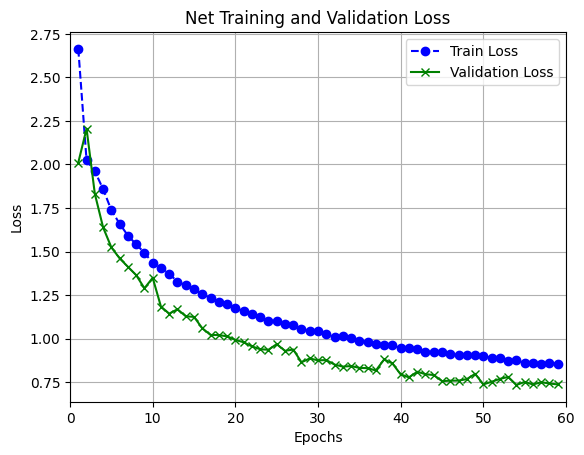

In [42]:
model_name = 'Net'
loss_or_accuracy = 'Loss'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

3.3.8 Plot training and validation accuracy

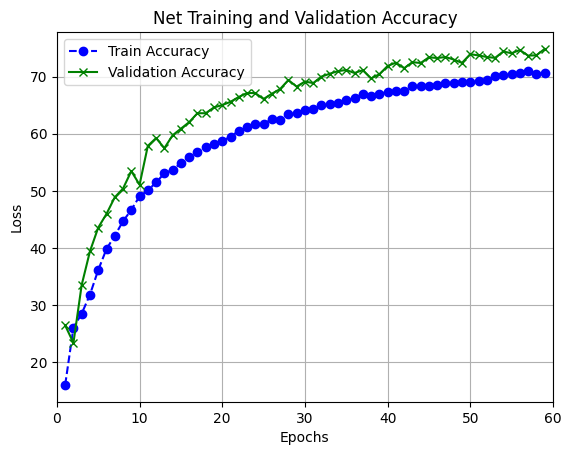

In [43]:
loss_or_accuracy = 'Accuracy'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

3.3.9 Prepare testing data

In [32]:
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).squeeze()

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

3.3.10 Predict using test set

In [33]:
def predict_test(nn_class,device,test_loader):
    nn_class.eval()
    test_total = 0
    test_correct = 0
    #Turns off gradient computation when predicting
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            #Get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            #Move the data to device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            #Forward pass
            inputs = inputs.permute(0, 3, 1, 2)
            outputs = nn_class(inputs)
            _, predicted = torch.max(outputs, 1)

            #Calculate accuracy
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100*test_correct/test_total
    return test_accuracy

In [46]:
test_accuracy = predict_test(net,device,test_loader)

3.3.11 Output key metrics

In [71]:
def print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy):
    min_val_loss_index = val_loss_list.index(min(val_loss_list))

    best_epoch = epoch_list[min_val_loss_index]
    best_train_loss = train_loss_list[min_val_loss_index]
    best_train_accuracy = train_accuracy_list[min_val_loss_index]
    best_val_loss = val_loss_list[min_val_loss_index]
    best_val_accuracy = val_accuracy_list[min_val_loss_index]

    print(f"%%%%%%%%%% Best {model_name} model results %%%%%%%%%%")
    print(f"Epoch: {best_epoch}")
    print(f"Train Loss: {best_train_loss:.4f}")
    print(f"Train Accuracy: {best_train_accuracy:.2f}%")
    print(f"Valid Loss: {best_val_loss:.4f}")
    print(f"Valid Accuracy: {best_val_accuracy:.2f}%")
    print(f'Test Accuracy: {test_accuracy:.2f}%')
    return best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy

In [48]:
model_name = 'Net'

best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy))

%%%%%%%%%% Best Net model results %%%%%%%%%%
Epoch: 54
Train Loss: 0.8765
Train Accuracy: 70.28%
Valid Loss: 0.7350
Valid Accuracy: 74.42%
Test Accuracy: 74.93%


3.3.12 Store results

In [35]:
def store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy,folder_path='outputs'):
    data_filename = os.path.join(folder_path,filename)
    model_results_DICT = {
        "epoch_list": epoch_list,
        "train_loss_list": train_loss_list,
        "train_accuracy_list": train_accuracy_list,
        "val_loss_list": val_loss_list,
        "val_accuracy_list": val_accuracy_list,
        "best_epoch": best_epoch,
        "train_loss": best_train_loss,
        "train_accuracy": best_train_accuracy,
        "val_loss": best_val_loss,
        "val_accuracy": best_val_accuracy,
        "test_accuracy": test_accuracy
    }

    create_folder(folder_path)
    save_pickle(model_results_DICT,data_filename)
    return model_results_DICT

In [50]:
filename = 'cifar_net_results.pkl'

model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)

3.3.13 Load results

In [36]:
def load_results(filename,folder_path='outputs'):
    data_filename = os.path.join(folder_path,filename)
    
    model_results_DICT = load_pickle(data_filename)
    
    epoch_list = model_results_DICT['epoch_list']
    train_loss_list = model_results_DICT['train_loss_list']
    train_accuracy_list = model_results_DICT['train_accuracy_list']
    val_loss_list = model_results_DICT['val_loss_list']
    val_accuracy_list = model_results_DICT['val_accuracy_list']
    best_epoch = model_results_DICT['best_epoch']
    best_train_loss = model_results_DICT['train_loss']
    best_train_accuracy = model_results_DICT['train_accuracy']
    best_val_loss = model_results_DICT['val_loss']
    best_val_accuracy = model_results_DICT['val_accuracy']
    test_accuracy = model_results_DICT['test_accuracy']
    
    return epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy

In [52]:
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

# 4.

4.1 Define the model

In [37]:
class LargerNet(nn.Module):
    def __init__(self,num_classes=10):
        super().__init__()
        #Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1)
        
        #Max pool layer
        self.pool = nn.MaxPool2d(2, 2)
        
        #ReLU activation
        self.relu = nn.ReLU()
        
        #Softmax activation
        self.softmax = nn.Softmax()
        
        #Dense layers
        self.fc1 = nn.Linear(self._get_conv_output_size(), 512)
        self.fc2 = nn.Linear(512, num_classes)

    def _get_conv_output_size(self):
        with torch.no_grad():
            x = torch.zeros(1, 3, 32, 32)
            x = self.pool(self.relu(self.conv1(x)))
            x = self.pool(self.relu(self.conv2(x)))
            x = self.pool(self.relu(self.conv3(x)))
            x = self.pool(self.relu(self.conv4(x)))
            return x.numel()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

4.2 Send model to device

In [68]:
larger_net = send_model_to_device(LargerNet())

4.3 Set loss and objective functions

In [69]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(larger_net.parameters(), lr=0.001)

4.4 Train model

In [70]:
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model(larger_net,criterion,optimizer)

Epoch 1/100, Train Loss: 1.9552, Train Accuracy: 28.32%, Val Loss: 1.6499, Val Accuracy: 38.82%
Epoch 2/100, Train Loss: 1.6173, Train Accuracy: 41.08%, Val Loss: 1.4292, Val Accuracy: 48.16%
Epoch 3/100, Train Loss: 1.4995, Train Accuracy: 45.84%, Val Loss: 1.3371, Val Accuracy: 51.13%
Epoch 4/100, Train Loss: 1.4141, Train Accuracy: 49.25%, Val Loss: 1.2724, Val Accuracy: 52.64%
Epoch 5/100, Train Loss: 1.3410, Train Accuracy: 51.94%, Val Loss: 1.2075, Val Accuracy: 56.70%
Epoch 6/100, Train Loss: 1.2875, Train Accuracy: 54.34%, Val Loss: 1.1450, Val Accuracy: 58.60%
Epoch 7/100, Train Loss: 1.2452, Train Accuracy: 55.70%, Val Loss: 1.0821, Val Accuracy: 61.03%
Epoch 8/100, Train Loss: 1.2030, Train Accuracy: 57.32%, Val Loss: 1.0668, Val Accuracy: 61.49%
Epoch 9/100, Train Loss: 1.1731, Train Accuracy: 58.61%, Val Loss: 1.0681, Val Accuracy: 61.27%
Epoch 10/100, Train Loss: 1.1332, Train Accuracy: 59.84%, Val Loss: 1.0325, Val Accuracy: 63.73%
Epoch 11/100, Train Loss: 1.1022, Train

4.5 Save model

In [71]:
model_path = './cifar_larger_net.pth'

#Save model to path
torch.save(larger_net.state_dict(), model_path)

4.6 Load model

In [ ]:
larger_net = load_model(LargerNet(),model_path,device)

C:\Users\matth\AppData\Local\Temp\ipykernel_13580\1283906922.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


4.7 Plot training and validation loss

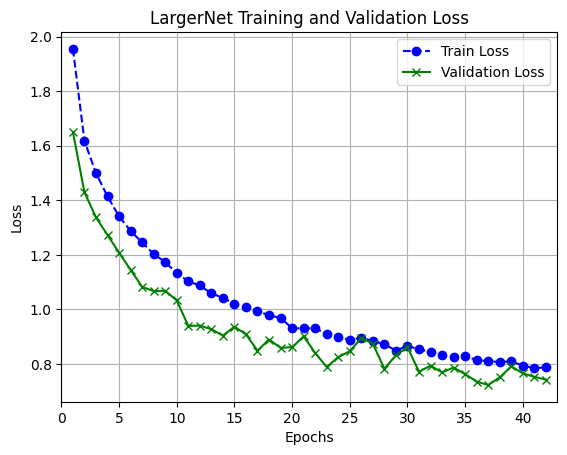

In [73]:
model_name = 'LargerNet'
loss_or_accuracy = 'Loss'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

4.8 Plot training and validation accuracy

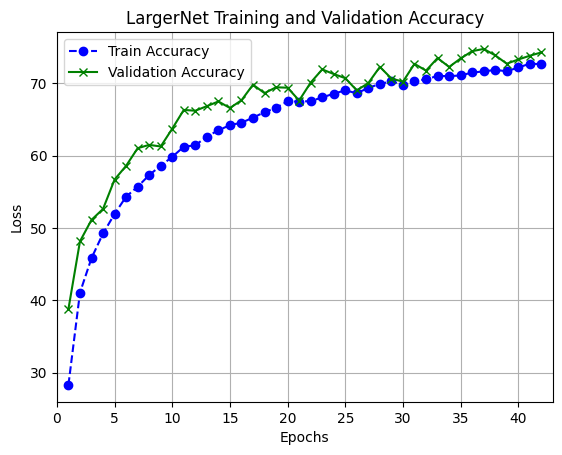

In [74]:
loss_or_accuracy = 'Accuracy'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

4.9 Predict using test set

In [117]:
test_accuracy = predict_test(larger_net,device,test_loader)

4.10 Output key metrics

In [ ]:
model_name = 'LargerNet'

best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy))

%%%%%%%%%% Best LargerNet model results %%%%%%%%%%
Epoch: 33
Train Loss: 0.8475
Train Accuracy: 70.41%
Valid Loss: 0.7786
Valid Accuracy: 72.82%
Test Accuracy: 74.36%


4.11 Store results

In [119]:
filename = 'cifar_larger_net_results.pkl'

model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)

4.12 Load results

In [120]:
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

4.13 Differences between LargerNet and Net performance results

The smaller neural network model seems to have slightly better performance as it produces a validation accuracy of 74.42% versus 72.82%, as well as a testing accuracy of 74.93% versus 74.36%. However, it takes much more iterations to reach that. However, the training accuracy was slightly better for the larger neural network with an accuracy of 70.41% versus 70.28%. Larger neural networks have a higher tendency to overfit the data, resulting in a larger training accuracy but smaller validation and testing accuracy.

# 5.

5.1 Define the model

In [39]:
class BatchNormLargerNet(nn.Module):
    def __init__(self,num_classes=10):
        super().__init__()
        #Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        
        #Max pool layer
        self.pool = nn.MaxPool2d(2, 2)
        
        #ReLU activation
        self.relu = nn.ReLU()
        
        #Softmax activation
        self.softmax = nn.Softmax()
        
        #Dense layers
        self.fc1 = nn.Linear(self._get_conv_output_size(), 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        
        self.fc2 = nn.Linear(512, num_classes)

    def _get_conv_output_size(self):
        with torch.no_grad():
            x = torch.zeros(1, 3, 32, 32)
            x = self.pool(self.bn1(self.relu(self.conv1(x))))
            x = self.pool(self.bn2(self.relu(self.conv2(x))))
            x = self.pool(self.bn3(self.relu(self.conv3(x))))
            x = self.pool(self.bn4(self.relu(self.conv4(x))))
            return x.numel()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

5.2 Send model to device

In [92]:
batch_norm_larger_net = send_model_to_device(BatchNormLargerNet())

5.3 Set loss and objective functions

In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(batch_norm_larger_net.parameters(), lr=0.001)

5.4 Train model

In [94]:
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model(batch_norm_larger_net,criterion,optimizer)

Epoch 1/100, Train Loss: 1.9893, Train Accuracy: 27.11%, Val Loss: 1.6469, Val Accuracy: 39.33%
Epoch 2/100, Train Loss: 1.6491, Train Accuracy: 40.00%, Val Loss: 1.4223, Val Accuracy: 47.82%
Epoch 3/100, Train Loss: 1.4883, Train Accuracy: 46.26%, Val Loss: 1.3108, Val Accuracy: 52.62%
Epoch 4/100, Train Loss: 1.3966, Train Accuracy: 49.86%, Val Loss: 1.2510, Val Accuracy: 55.45%
Epoch 5/100, Train Loss: 1.3421, Train Accuracy: 52.42%, Val Loss: 1.2248, Val Accuracy: 56.02%
Epoch 6/100, Train Loss: 1.2793, Train Accuracy: 54.54%, Val Loss: 1.1464, Val Accuracy: 59.48%
Epoch 7/100, Train Loss: 1.2483, Train Accuracy: 55.74%, Val Loss: 1.1863, Val Accuracy: 58.79%
Epoch 8/100, Train Loss: 1.2066, Train Accuracy: 57.47%, Val Loss: 1.0861, Val Accuracy: 61.60%
Epoch 9/100, Train Loss: 1.1655, Train Accuracy: 58.99%, Val Loss: 1.0425, Val Accuracy: 62.65%
Epoch 10/100, Train Loss: 1.1263, Train Accuracy: 60.13%, Val Loss: 0.9883, Val Accuracy: 65.02%
Epoch 11/100, Train Loss: 1.1023, Train

5.5 Save model

In [95]:
model_path = './cifar_batch_norm_larger_net.pth'

#Save model to path
torch.save(batch_norm_larger_net.state_dict(), model_path)

5.6 Load model

In [76]:
batch_norm_larger_net = load_model(BatchNormLargerNet(),model_path,device)

C:\Users\matth\AppData\Local\Temp\ipykernel_16688\1283906922.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


5.7 Plot training and validation loss

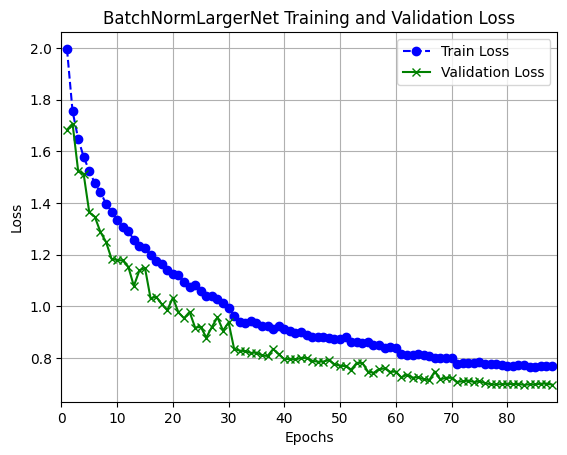

In [77]:
model_name = 'BatchNormLargerNet'
loss_or_accuracy = 'Loss'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

5.8 Plot training and validation accuracy

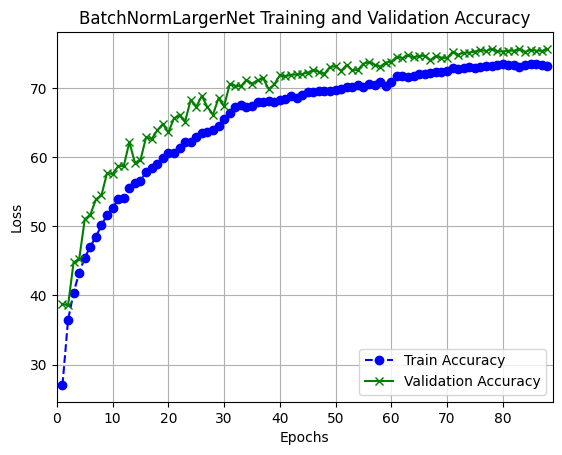

In [78]:
loss_or_accuracy = 'Accuracy'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

5.9 Predict using test set

In [121]:
test_accuracy = predict_test(batch_norm_larger_net,device,test_loader)

5.10 Output key metrics

In [75]:
model_name = 'BatchNormLargerNet'

best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy)

%%%%%%%%%% Best BatchNormLargerNet model results %%%%%%%%%%
Epoch: 83
Train Loss: 0.7744
Train Accuracy: 73.05%
Valid Loss: 0.6957
Valid Accuracy: 75.57%
Test Accuracy: 75.91%


5.11 Store results

In [123]:
filename = 'cifar_batch_norm_larger_net_results.pkl'

model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)

5.12 Load results

In [74]:
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

5.13 Differences between BatchNormLargerNet and LargerNet performance results

Here, the training, validation and testing accuracy all seem to be larger compared the the LargerNet model. However, it takes more epochs to reach this level.

# 6.

6.1 Import libraries

In [44]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

6.2 Send model to device

In [46]:
batch_norm_larger_net_SGD = send_model_to_device(BatchNormLargerNet())

6.3 Set loss and objective functions

In [47]:
optimizer = optim.SGD(batch_norm_larger_net_SGD.parameters(), lr=0.001, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

6.4 Train model

In [48]:
def train_model_with_scheduled_lr(nn_class,criterion,optimizer,scheduler):
    best_val_loss = np.inf
    num_epochs_without_improvement = 0
    early_stopping = False

    epoch_list = []
    train_loss_list = []
    train_accuracy_list = []
    val_loss_list = []
    val_accuracy_list = []

    #Loop over the dataset multiple times
    for epoch in range(epochs):
        nn_class.eval()
        running_loss = 0.0
        train_correct = 0
        train_total = 0
        for i, data in enumerate(train_loader):
            #Get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            #Move the data to device
            inputs = inputs.to(device)
            labels = labels.to(device)

            if labels.dim() > 1:
                labels = labels.squeeze(1)

            #Zero the parameter gradients
            optimizer.zero_grad()

            #Forward + backward + optimize
            outputs = nn_class(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            #Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            
        train_loss = running_loss/len(train_loader)
        train_accuracy = 100*train_correct/train_total
        
        nn_class.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for i, data in enumerate(val_loader):
                #Get the inputs; data is a list of [inputs, labels]
                inputs, labels = data
                
                #Move the data to device
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                if labels.dim() > 1:
                    labels = labels.squeeze(1)
                
                #Forward pass
                outputs = nn_class(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                #Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_loss/len(val_loader)
        val_accuracy = 100*val_correct/val_total
        
        epoch_list.append(epoch+1)
        train_loss_list.append(train_loss)
        train_accuracy_list.append(train_accuracy)
        val_loss_list.append(val_loss)
        val_accuracy_list.append(val_accuracy)
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
        
        scheduler.step(val_loss)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            num_epochs_without_improvement = 0
            best_model_weights = nn_class.state_dict()
        else:
            num_epochs_without_improvement += 1
        
        if num_epochs_without_improvement >= patience_num_epochs:
            print(f'Early stopping occured at epoch {epoch+1}')
            early_stopping = True
            break

    if early_stopping:
        nn_class.load_state_dict(best_model_weights)
    print("Selected the best model weights from early stopping.")
    return epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list

In [164]:
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model_with_scheduled_lr(batch_norm_larger_net_SGD,criterion,optimizer,scheduler)

Epoch 1/100, Train Loss: 2.0512, Train Accuracy: 24.81%, Val Loss: 1.7786, Val Accuracy: 35.83%
Epoch 2/100, Train Loss: 1.8009, Train Accuracy: 34.81%, Val Loss: 1.6145, Val Accuracy: 40.64%
Epoch 3/100, Train Loss: 1.6870, Train Accuracy: 38.91%, Val Loss: 1.5099, Val Accuracy: 44.73%
Epoch 4/100, Train Loss: 1.6259, Train Accuracy: 41.23%, Val Loss: 1.4805, Val Accuracy: 46.46%
Epoch 5/100, Train Loss: 1.5437, Train Accuracy: 44.88%, Val Loss: 1.4365, Val Accuracy: 47.92%
Epoch 6/100, Train Loss: 1.5011, Train Accuracy: 46.60%, Val Loss: 1.3308, Val Accuracy: 51.75%
Epoch 7/100, Train Loss: 1.4481, Train Accuracy: 48.31%, Val Loss: 1.2875, Val Accuracy: 52.75%
Epoch 8/100, Train Loss: 1.4078, Train Accuracy: 49.89%, Val Loss: 1.2237, Val Accuracy: 56.22%
Epoch 9/100, Train Loss: 1.3855, Train Accuracy: 50.70%, Val Loss: 1.2029, Val Accuracy: 56.43%
Epoch 10/100, Train Loss: 1.3485, Train Accuracy: 52.52%, Val Loss: 1.1788, Val Accuracy: 57.91%
Epoch 11/100, Train Loss: 1.3177, Train

6.5 Save model

In [165]:
model_path = './cifar_batch_norm_larger_net_SGD.pth'

#Save model to path
torch.save(batch_norm_larger_net_SGD.state_dict(), model_path)

6.6 Load model

In [166]:
batch_norm_larger_net_SGD = load_model(BatchNormLargerNet(),model_path,device)

C:\Users\matth\AppData\Local\Temp\ipykernel_13580\1283906922.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


6.7 Plot training and validation loss

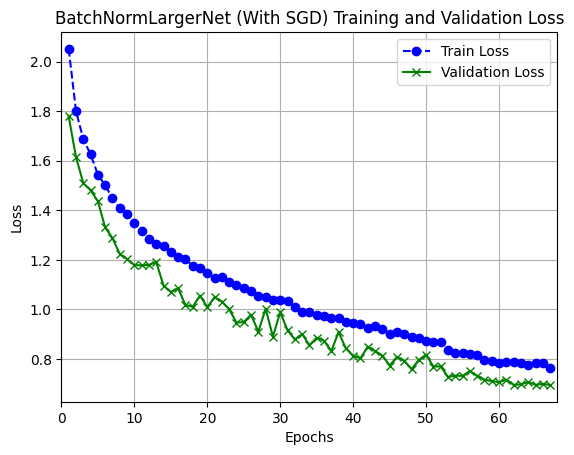

In [167]:
model_name = 'BatchNormLargerNet (With SGD)'
loss_or_accuracy = 'Loss'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

6.8 Plot training and validation accuracy

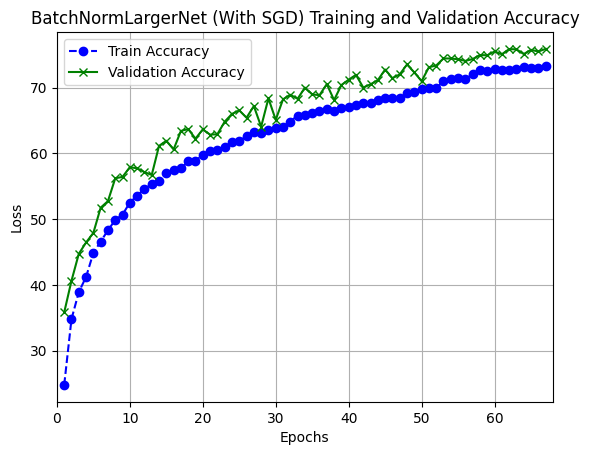

In [168]:
loss_or_accuracy = 'Accuracy'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

6.9 Predict using test set

In [173]:
test_accuracy = predict_test(batch_norm_larger_net_SGD,device,test_loader)

6.10 Output key metrics

In [174]:
model_name = 'BatchNormLargerNet (With SGD)'

best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy))

%%%%%%%%%% Best BatchNormLargerNet (With SGD) model results %%%%%%%%%%
Epoch: 62
Train Loss: 0.7881
Train Accuracy: 72.67%
Valid Loss: 0.6950
Valid Accuracy: 75.85%
Test Accuracy: 75.16%


6.11 Store results

In [171]:
filename = 'cifar_batch_norm_larger_net_SGD_results.pkl'

model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)

6.12 Load results

In [172]:
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

6.13 Differences between BatchNormLargerNet (with SGD) and BatchNormLargerNet (with Adam) performance results

The performance results are seen to be similar between the two models. However, the SGD model converges quite faster.

# 7.

7.1 Define model

In [66]:
class BatchNormLargerNetWithDropout(nn.Module):
    def __init__(self,dropout_rate,num_classes=10):
        super().__init__()
        #Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        
        #Max pool layer
        self.pool = nn.MaxPool2d(2, 2)
        
        #ReLU activation
        self.relu = nn.ReLU()
        
        #Softmax activation
        self.softmax = nn.Softmax()
        
        #Dense layers
        self.fc1 = nn.Linear(self._get_conv_output_size(), 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(512, num_classes)

    def _get_conv_output_size(self):
        with torch.no_grad():
            x = torch.zeros(1, 3, 32, 32)
            x = self.pool(self.bn1(self.relu(self.conv1(x))))
            x = self.pool(self.bn2(self.relu(self.conv2(x))))
            x = self.pool(self.bn3(self.relu(self.conv3(x))))
            x = self.pool(self.bn4(self.relu(self.conv4(x))))
            return x.numel()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

7.2 Train, validate and test the model

In [ ]:
dropout_rate_list = [0.3, 0.5, 0.7]

list_of_batch_norm_larger_net_with_dropout_SGDs = []
list_of_epoch_lists = []
list_of_train_loss_lists = []
list_of_train_accuracy_lists = []
list_of_val_loss_lists = []
list_of_val_accuracy_lists = []
list_of_test_accuracies = []
for dropout_rate in dropout_rate_list:
    batch_norm_larger_net_with_dropout_SGD = send_model_to_device(BatchNormLargerNetWithDropout(dropout_rate))
    optimizer = optim.SGD(batch_norm_larger_net_with_dropout_SGD.parameters(), lr=0.001, momentum=0.9)
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
    print(f'############################## Dropout Rate: {dropout_rate} ##############################')
    epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model_with_scheduled_lr(batch_norm_larger_net_with_dropout_SGD,criterion,optimizer,scheduler)
    print()
    print()
    print()
    print()
    print()
    model_path = './cifar_batch_norm_larger_net_with_dropout_SGD_'+str(dropout_rate)+'.pth'

    #Save model to path
    torch.save(batch_norm_larger_net_with_dropout_SGD.state_dict(), model_path)
    batch_norm_larger_net_with_dropout_SGD = load_model(BatchNormLargerNetWithDropout(dropout_rate),model_path,device)
    test_accuracy = predict_test(batch_norm_larger_net_with_dropout_SGD,device,test_loader)

    filename = 'cifar_batch_norm_larger_net_with_dropout_SGD_results_'+str(dropout_rate)+'.pkl'

    min_val_loss_index = val_loss_list.index(min(val_loss_list))
    best_epoch = epoch_list[min_val_loss_index]
    best_train_loss = train_loss_list[min_val_loss_index]
    best_train_accuracy = train_accuracy_list[min_val_loss_index]
    best_val_loss = val_loss_list[min_val_loss_index]
    best_val_accuracy = val_accuracy_list[min_val_loss_index]

    model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)
    epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

    list_of_batch_norm_larger_net_with_dropout_SGDs.append(batch_norm_larger_net_with_dropout_SGD)
    list_of_epoch_lists.append(epoch_list)
    list_of_train_loss_lists.append(train_loss_list)
    list_of_train_accuracy_lists.append(train_accuracy_list)
    list_of_val_loss_lists.append(val_loss_list)
    list_of_val_accuracy_lists.append(val_accuracy_list)
    list_of_test_accuracies.append(test_accuracy)


############################## Dropout Rate: 0.3 ##############################
Epoch 1/100, Train Loss: 2.0248, Train Accuracy: 25.68%, Val Loss: 1.7291, Val Accuracy: 37.61%
Epoch 2/100, Train Loss: 1.7624, Train Accuracy: 35.99%, Val Loss: 1.5757, Val Accuracy: 43.32%
Epoch 3/100, Train Loss: 1.6581, Train Accuracy: 40.25%, Val Loss: 1.4935, Val Accuracy: 45.14%
Epoch 4/100, Train Loss: 1.5907, Train Accuracy: 43.09%, Val Loss: 1.3790, Val Accuracy: 50.55%
Epoch 5/100, Train Loss: 1.5197, Train Accuracy: 45.57%, Val Loss: 1.4115, Val Accuracy: 49.00%
Epoch 6/100, Train Loss: 1.4651, Train Accuracy: 48.05%, Val Loss: 1.3642, Val Accuracy: 50.15%
Epoch 7/100, Train Loss: 1.4190, Train Accuracy: 49.62%, Val Loss: 1.2406, Val Accuracy: 54.85%
Epoch 8/100, Train Loss: 1.3801, Train Accuracy: 51.02%, Val Loss: 1.2957, Val Accuracy: 51.99%
Epoch 9/100, Train Loss: 1.3500, Train Accuracy: 52.27%, Val Loss: 1.1753, Val Accuracy: 57.25%
Epoch 10/100, Train Loss: 1.3222, Train Accuracy: 53.49%

<ipython-input-8-3d98e959285d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


############################## Dropout Rate: 0.5 ##############################
Epoch 1/100, Train Loss: 2.1385, Train Accuracy: 21.97%, Val Loss: 1.8540, Val Accuracy: 32.10%
Epoch 2/100, Train Loss: 1.8261, Train Accuracy: 33.93%, Val Loss: 1.6478, Val Accuracy: 39.04%
Epoch 3/100, Train Loss: 1.6885, Train Accuracy: 38.88%, Val Loss: 1.5605, Val Accuracy: 43.42%
Epoch 4/100, Train Loss: 1.6151, Train Accuracy: 41.95%, Val Loss: 1.4259, Val Accuracy: 48.29%
Epoch 5/100, Train Loss: 1.5535, Train Accuracy: 44.34%, Val Loss: 1.5047, Val Accuracy: 46.57%
Epoch 6/100, Train Loss: 1.5003, Train Accuracy: 46.63%, Val Loss: 1.3252, Val Accuracy: 51.91%
Epoch 7/100, Train Loss: 1.4641, Train Accuracy: 47.62%, Val Loss: 1.3282, Val Accuracy: 52.26%
Epoch 8/100, Train Loss: 1.4333, Train Accuracy: 49.24%, Val Loss: 1.2608, Val Accuracy: 54.81%
Epoch 9/100, Train Loss: 1.3884, Train Accuracy: 50.66%, Val Loss: 1.2385, Val Accuracy: 55.27%
Epoch 10/100, Train Loss: 1.3721, Train Accuracy: 51.34%

7.3 Plot training and validation loss

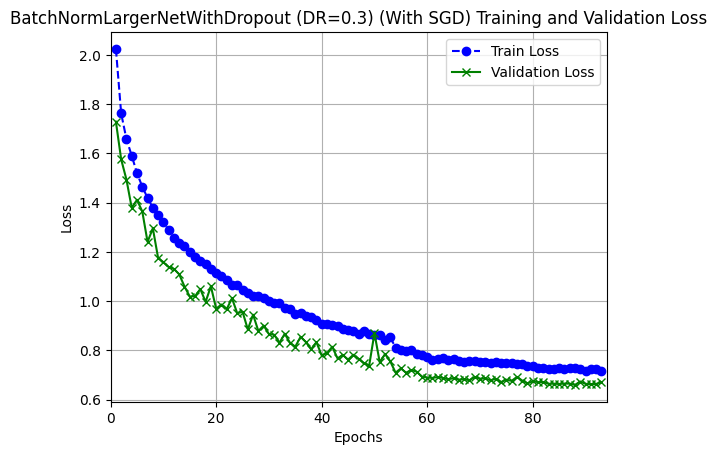

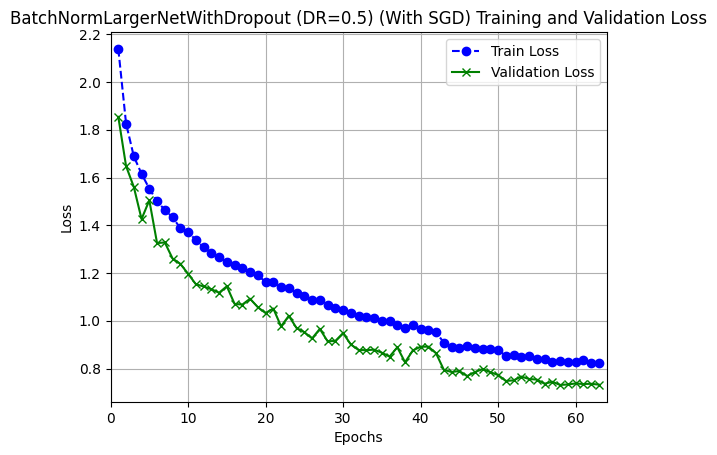

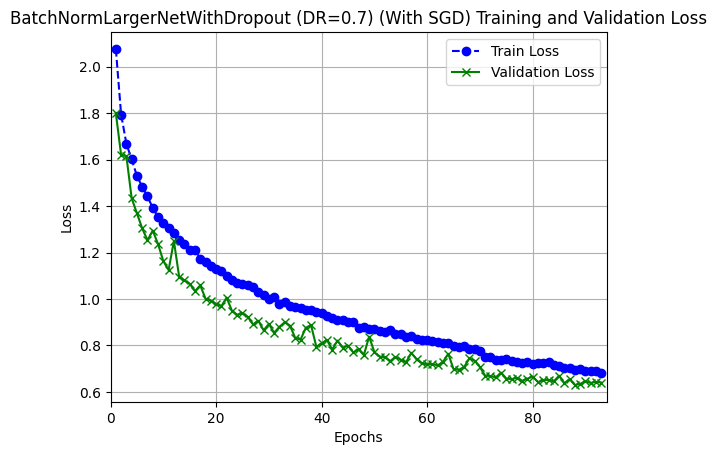

In [ ]:
loss_or_accuracy = 'Loss'
for i in range(len(dropout_rate_list)):
    dropout_rate = dropout_rate_list[i]
    epoch_list = list_of_epoch_lists[i]
    train_loss_list = list_of_train_loss_lists[i]
    val_loss_list = list_of_val_loss_lists[i]

    model_name = f'BatchNormLargerNetWithDropout (DR={dropout_rate}) (With SGD)'

    plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

7.4 Plot training and validation accuracy

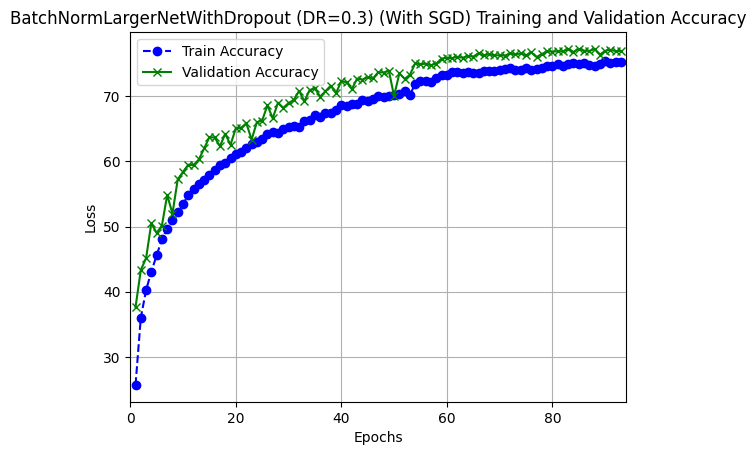

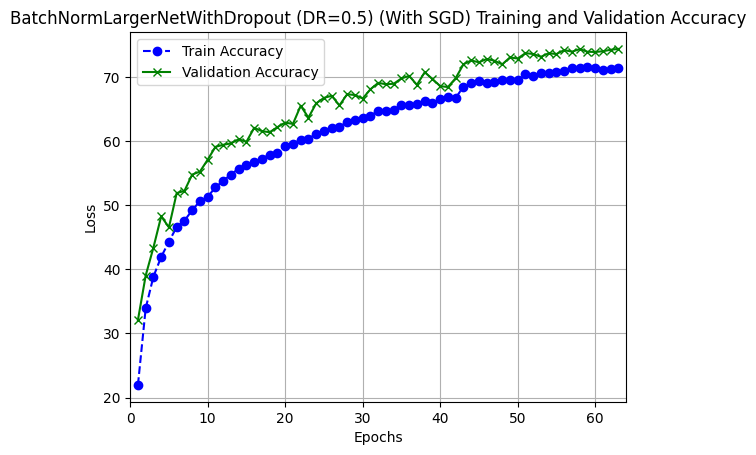

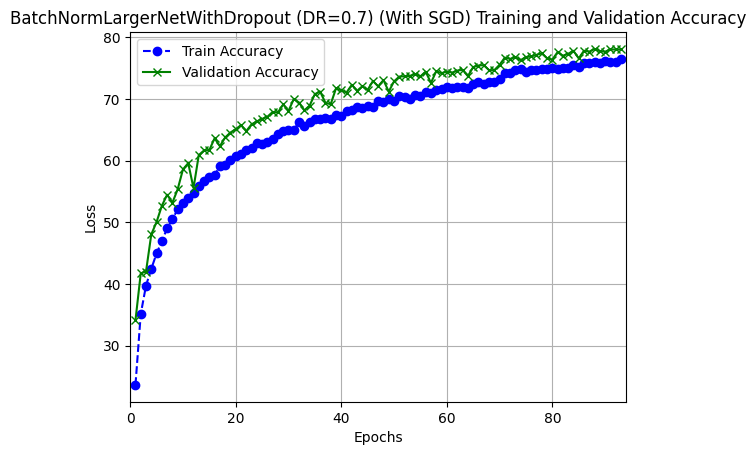

In [ ]:
loss_or_accuracy = 'Accuracy'
for i in range(len(dropout_rate_list)):
    dropout_rate = dropout_rate_list[i]
    epoch_list = list_of_epoch_lists[i]
    train_accuracy_list = list_of_train_accuracy_lists[i]
    val_accuracy_list = list_of_val_accuracy_lists[i]

    model_name = f'BatchNormLargerNetWithDropout (DR={dropout_rate}) (With SGD)'

    plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

7.5 Output key metrics

In [ ]:
for i in range(len(dropout_rate_list)):
    dropout_rate = dropout_rate_list[i]
    epoch_list = list_of_epoch_lists[i]
    train_loss_list = list_of_train_loss_lists[i]
    train_accuracy_list = list_of_train_accuracy_lists[i]
    val_loss_list = list_of_val_loss_lists[i]
    val_accuracy_list = list_of_val_accuracy_lists[i]
    test_accuracy = list_of_test_accuracies[i]

    model_name = f'BatchNormLargerNetWithDropout (DR={dropout_rate}) (With SGD)'
    best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy)

%%%%%%%%%% Best BatchNormLargerNetWithDropout (DR=0.3) (With SGD) model results %%%%%%%%%%
Epoch: 88
Train Loss: 0.7273
Train Accuracy: 74.61%
Valid Loss: 0.6593
Valid Accuracy: 77.26%
Test Accuracy: 76.30%
%%%%%%%%%% Best BatchNormLargerNetWithDropout (DR=0.5) (With SGD) model results %%%%%%%%%%
Epoch: 58
Train Loss: 0.8320
Train Accuracy: 71.36%
Valid Loss: 0.7314
Valid Accuracy: 74.39%
Test Accuracy: 74.74%
%%%%%%%%%% Best BatchNormLargerNetWithDropout (DR=0.7) (With SGD) model results %%%%%%%%%%
Epoch: 88
Train Loss: 0.6959
Train Accuracy: 76.06%
Valid Loss: 0.6302
Valid Accuracy: 78.12%
Test Accuracy: 77.46%


7.6 Best dropout rate used for BatchNormLargerNetWithDropout (with SGD)

The best dropout rate is 0.7. This is likely because this allows the model to eliminate notes that are not important for predicting which helps prevent overfitting.

7.7 Differences between BatchNormLargerNetWithDropout (with SGD) and BatchNormLargerNet (with SGD) performance results

Adding dropout had a significant positive effect on the accuracy.

# 8.

8.1 Define the model

In [48]:
class OptimizedNet(nn.Module):
    def __init__(self,dropout_rate,num_classes=10):
        super().__init__()        
        #Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(5, 5), padding=2)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        
        #Max pool layer
        self.pool = nn.MaxPool2d(2, 2)
        
        #Leaky ReLU activation
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        
        #Softmax activation
        self.softmax = nn.Softmax()
        
        #Dense layers
        self.fc1 = nn.Linear(self._get_conv_output_size(), 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(512, num_classes)

    def _get_conv_output_size(self):
        with torch.no_grad():
            x = torch.zeros(1, 3, 32, 32)
            x = self.bn1(self.conv1(x))
            x = self.pool(self.bn2(self.conv2(x)))
            x = self.bn3(self.conv3(x))
            x = self.pool(self.bn4(self.conv4(x)))
            x = self.bn5(self.conv5(x))
            x = self.pool(self.bn6(self.conv6(x)))
            return x.numel()
    
    def forward(self, x):
        x = self.leaky_relu(self.bn1(self.conv1(x)))
        x = self.pool(self.leaky_relu(self.bn2(self.conv2(x))))
        x = self.leaky_relu(self.bn3(self.conv3(x)))
        x = self.pool(self.leaky_relu(self.bn4(self.conv4(x))))
        x = self.leaky_relu(self.bn5(self.conv5(x)))
        x = self.pool(self.leaky_relu(self.bn6(self.conv6(x))))
        x = torch.flatten(x, 1)
        x = self.leaky_relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

8.2 Train, validate and test the model (DR = 0.0)

In [ ]:
dropout_rate = 0.0
optimized_net = send_model_to_device(OptimizedNet(dropout_rate))
optimizer = optim.SGD(optimized_net.parameters(), lr=0.001, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
print(f'############################## Dropout Rate: {dropout_rate} ##############################')
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model_with_scheduled_lr(optimized_net,criterion,optimizer,scheduler)
model_path = './cifar_optimized_net_'+str(dropout_rate)+'.pth'

#Save model to path
torch.save(optimized_net.state_dict(), model_path)
optimized_net = load_model(OptimizedNet(dropout_rate),model_path,device)
test_accuracy = predict_test(optimized_net,device,test_loader)

filename = 'cifar_optimized_net_results_'+str(dropout_rate)+'.pkl'

min_val_loss_index = val_loss_list.index(min(val_loss_list))
best_epoch = epoch_list[min_val_loss_index]
best_train_loss = train_loss_list[min_val_loss_index]
best_train_accuracy = train_accuracy_list[min_val_loss_index]
best_val_loss = val_loss_list[min_val_loss_index]
best_val_accuracy = val_accuracy_list[min_val_loss_index]

model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

############################## Dropout Rate: 0.0 ##############################
Epoch 1/100, Train Loss: 2.0727, Train Accuracy: 23.31%, Val Loss: 1.8352, Val Accuracy: 33.15%
Epoch 2/100, Train Loss: 1.8150, Train Accuracy: 33.98%, Val Loss: 1.6491, Val Accuracy: 40.95%
Epoch 3/100, Train Loss: 1.6831, Train Accuracy: 39.05%, Val Loss: 1.5292, Val Accuracy: 43.60%
Epoch 4/100, Train Loss: 1.5961, Train Accuracy: 42.44%, Val Loss: 1.4057, Val Accuracy: 48.97%
Epoch 5/100, Train Loss: 1.5392, Train Accuracy: 44.90%, Val Loss: 1.3888, Val Accuracy: 50.07%
Epoch 6/100, Train Loss: 1.4811, Train Accuracy: 46.85%, Val Loss: 1.4132, Val Accuracy: 48.33%
Epoch 7/100, Train Loss: 1.4291, Train Accuracy: 49.38%, Val Loss: 1.3549, Val Accuracy: 51.38%
Epoch 8/100, Train Loss: 1.3723, Train Accuracy: 51.34%, Val Loss: 1.1843, Val Accuracy: 57.21%
Epoch 9/100, Train Loss: 1.3230, Train Accuracy: 53.56%, Val Loss: 1.1455, Val Accuracy: 58.80%
Epoch 10/100, Train Loss: 1.2817, Train Accuracy: 54.70%

<ipython-input-8-3d98e959285d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


8.3 Plot training and validation loss (DR = 0.0)

loss_or_accuracy = 'Loss'
model_name = f'OptimizedNet (DR={dropout_rate}) (With SGD)'

#plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

8.4 Plot training and validation accuracy (DR = 0.0)

In [ ]:
loss_or_accuracy = 'Accuracy'

#plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

8.5 Output key metrics (DR = 0.0)

In [ ]:
#best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy)

8.6 Train, validate and test the model (DR = 0.3)

In [ ]:
dropout_rate = 0.3
optimized_net = send_model_to_device(OptimizedNet(dropout_rate))
optimizer = optim.SGD(optimized_net.parameters(), lr=0.001, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
print(f'############################## Dropout Rate: {dropout_rate} ##############################')
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model_with_scheduled_lr(optimized_net,criterion,optimizer,scheduler)
model_path = './cifar_optimized_net_'+str(dropout_rate)+'.pth'

#Save model to path
torch.save(optimized_net.state_dict(), model_path)
optimized_net = load_model(OptimizedNet(dropout_rate),model_path,device)
test_accuracy = predict_test(optimized_net,device,test_loader)

filename = 'cifar_optimized_net_results_'+str(dropout_rate)+'.pkl'

min_val_loss_index = val_loss_list.index(min(val_loss_list))
best_epoch = epoch_list[min_val_loss_index]
best_train_loss = train_loss_list[min_val_loss_index]
best_train_accuracy = train_accuracy_list[min_val_loss_index]
best_val_loss = val_loss_list[min_val_loss_index]
best_val_accuracy = val_accuracy_list[min_val_loss_index]

model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

############################## Dropout Rate: 0.3 ##############################
Epoch 1/100, Train Loss: 2.0731, Train Accuracy: 23.32%, Val Loss: 1.8262, Val Accuracy: 33.81%
Epoch 2/100, Train Loss: 1.8150, Train Accuracy: 33.94%, Val Loss: 1.6517, Val Accuracy: 40.54%
Epoch 3/100, Train Loss: 1.6849, Train Accuracy: 38.87%, Val Loss: 1.5187, Val Accuracy: 43.69%
Epoch 4/100, Train Loss: 1.5945, Train Accuracy: 42.55%, Val Loss: 1.4132, Val Accuracy: 49.19%
Epoch 5/100, Train Loss: 1.5360, Train Accuracy: 45.02%, Val Loss: 1.3768, Val Accuracy: 50.85%
Epoch 6/100, Train Loss: 1.4789, Train Accuracy: 47.00%, Val Loss: 1.3753, Val Accuracy: 49.63%
Epoch 7/100, Train Loss: 1.4224, Train Accuracy: 49.61%, Val Loss: 1.3161, Val Accuracy: 53.03%
Epoch 8/100, Train Loss: 1.3678, Train Accuracy: 51.61%, Val Loss: 1.2093, Val Accuracy: 56.49%
Epoch 9/100, Train Loss: 1.3221, Train Accuracy: 53.73%, Val Loss: 1.1618, Val Accuracy: 58.04%
Epoch 10/100, Train Loss: 1.2760, Train Accuracy: 54.90%

<ipython-input-8-3d98e959285d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


8.7 Plot training and validation loss (DR = 0.3)

In [ ]:
loss_or_accuracy = 'Loss'
model_name = f'OptimizedNet (DR={dropout_rate}) (With SGD)'

#plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

8.8 Plot training and validation accuracy (DR = 0.3)

In [ ]:
loss_or_accuracy = 'Accuracy'

#plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

8.9 Output key metrics (DR = 0.3)

In [ ]:
#best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy)

8.10 Train, validate and test the model (DR = 0.5)

In [ ]:
dropout_rate = 0.5
optimized_net = send_model_to_device(OptimizedNet(dropout_rate))
optimizer = optim.SGD(optimized_net.parameters(), lr=0.001, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
print(f'############################## Dropout Rate: {dropout_rate} ##############################')
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model_with_scheduled_lr(optimized_net,criterion,optimizer,scheduler)
model_path = './cifar_optimized_net_'+str(dropout_rate)+'.pth'

#Save model to path
torch.save(optimized_net.state_dict(), model_path)
optimized_net = load_model(OptimizedNet(dropout_rate),model_path,device)
test_accuracy = predict_test(optimized_net,device,test_loader)

filename = 'cifar_optimized_net_results_'+str(dropout_rate)+'.pkl'

min_val_loss_index = val_loss_list.index(min(val_loss_list))
best_epoch = epoch_list[min_val_loss_index]
best_train_loss = train_loss_list[min_val_loss_index]
best_train_accuracy = train_accuracy_list[min_val_loss_index]
best_val_loss = val_loss_list[min_val_loss_index]
best_val_accuracy = val_accuracy_list[min_val_loss_index]

model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

############################## Dropout Rate: 0.5 ##############################
Epoch 1/100, Train Loss: 2.0727, Train Accuracy: 23.31%, Val Loss: 1.8352, Val Accuracy: 33.15%
Epoch 2/100, Train Loss: 1.8154, Train Accuracy: 34.03%, Val Loss: 1.6487, Val Accuracy: 40.89%
Epoch 3/100, Train Loss: 1.6831, Train Accuracy: 39.08%, Val Loss: 1.5199, Val Accuracy: 43.86%
Epoch 4/100, Train Loss: 1.5962, Train Accuracy: 42.46%, Val Loss: 1.3991, Val Accuracy: 49.27%
Epoch 5/100, Train Loss: 1.5397, Train Accuracy: 44.91%, Val Loss: 1.3769, Val Accuracy: 50.53%
Epoch 6/100, Train Loss: 1.4826, Train Accuracy: 47.02%, Val Loss: 1.3949, Val Accuracy: 48.73%
Epoch 7/100, Train Loss: 1.4297, Train Accuracy: 49.31%, Val Loss: 1.3583, Val Accuracy: 51.39%
Epoch 8/100, Train Loss: 1.3723, Train Accuracy: 51.30%, Val Loss: 1.2039, Val Accuracy: 56.65%
Epoch 9/100, Train Loss: 1.3265, Train Accuracy: 53.50%, Val Loss: 1.1759, Val Accuracy: 57.94%
Epoch 10/100, Train Loss: 1.2779, Train Accuracy: 54.49%

<ipython-input-8-3d98e959285d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


8.11 Plot training and validation loss (DR = 0.5)

In [ ]:
loss_or_accuracy = 'Loss'
model_name = f'OptimizedNet (DR={dropout_rate}) (With SGD)'

#plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

8.12 Plot training and validation accuracy (DR = 0.5)

In [ ]:
loss_or_accuracy = 'Accuracy'

#plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

8.13 Output key metrics (DR = 0.5)

In [ ]:
#best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy)

8.14 Train, validate and test the model (DR = 0.7)

In [ ]:
dropout_rate = 0.7
optimized_net = send_model_to_device(OptimizedNet(dropout_rate))
optimizer = optim.SGD(optimized_net.parameters(), lr=0.001, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
print(f'############################## Dropout Rate: {dropout_rate} ##############################')
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list = train_model_with_scheduled_lr(optimized_net,criterion,optimizer,scheduler)
model_path = './cifar_optimized_net_'+str(dropout_rate)+'.pth'

#Save model to path
torch.save(optimized_net.state_dict(), model_path)
optimized_net = load_model(OptimizedNet(dropout_rate),model_path,device)
test_accuracy = predict_test(optimized_net,device,test_loader)

filename = 'cifar_optimized_net_results_'+str(dropout_rate)+'.pkl'

min_val_loss_index = val_loss_list.index(min(val_loss_list))
best_epoch = epoch_list[min_val_loss_index]
best_train_loss = train_loss_list[min_val_loss_index]
best_train_accuracy = train_accuracy_list[min_val_loss_index]
best_val_loss = val_loss_list[min_val_loss_index]
best_val_accuracy = val_accuracy_list[min_val_loss_index]

model_results_DICT = store_results(filename,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy)
epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = load_results(filename)

############################## Dropout Rate: 0.7 ##############################
Epoch 1/100, Train Loss: 2.0731, Train Accuracy: 23.32%, Val Loss: 1.8262, Val Accuracy: 33.81%
Epoch 2/100, Train Loss: 1.8153, Train Accuracy: 33.96%, Val Loss: 1.6571, Val Accuracy: 40.32%
Epoch 3/100, Train Loss: 1.6846, Train Accuracy: 38.86%, Val Loss: 1.5165, Val Accuracy: 43.91%
Epoch 4/100, Train Loss: 1.5925, Train Accuracy: 42.59%, Val Loss: 1.4032, Val Accuracy: 49.30%
Epoch 5/100, Train Loss: 1.5369, Train Accuracy: 44.95%, Val Loss: 1.3841, Val Accuracy: 50.33%
Epoch 6/100, Train Loss: 1.4785, Train Accuracy: 47.15%, Val Loss: 1.3861, Val Accuracy: 49.46%
Epoch 7/100, Train Loss: 1.4256, Train Accuracy: 49.53%, Val Loss: 1.3164, Val Accuracy: 52.79%
Epoch 8/100, Train Loss: 1.3718, Train Accuracy: 51.63%, Val Loss: 1.2311, Val Accuracy: 55.58%
Epoch 9/100, Train Loss: 1.3229, Train Accuracy: 53.68%, Val Loss: 1.1802, Val Accuracy: 57.34%
Epoch 10/100, Train Loss: 1.2778, Train Accuracy: 54.77%

<ipython-input-8-3d98e959285d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_class.load_state_dict(torch.load(model_path))


8.15 Plot training and validation loss (DR = 0.7)

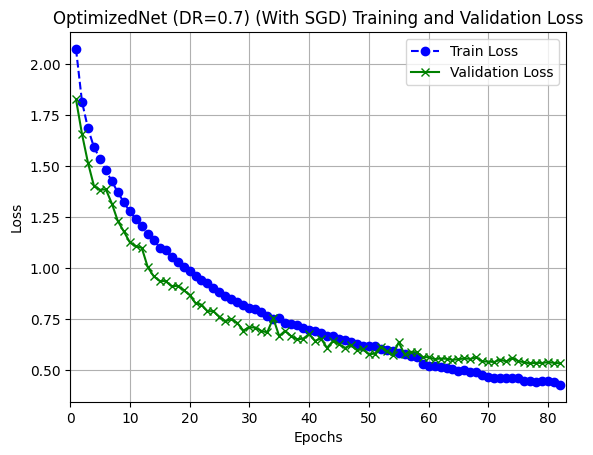

In [ ]:
loss_or_accuracy = 'Loss'
model_name = f'OptimizedNet (DR={dropout_rate}) (With SGD)'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_loss_list,val_loss_list)

8.16 Plot training and validation accuracy (DR = 0.7)

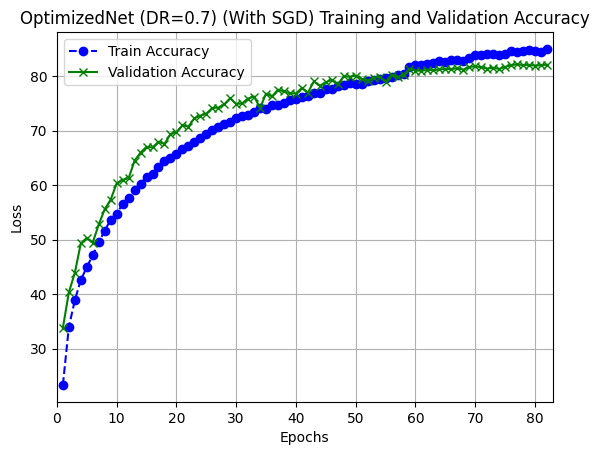

In [ ]:
loss_or_accuracy = 'Accuracy'

plot_train_valid(model_name,loss_or_accuracy,epoch_list,train_accuracy_list,val_accuracy_list)

8.17 Output key metrics (DR = 0.7)

In [ ]:
best_epoch,best_train_loss,best_train_accuracy,best_val_loss,best_val_accuracy,test_accuracy = print_key_metrics(model_name,epoch_list,train_loss_list,train_accuracy_list,val_loss_list,val_accuracy_list,test_accuracy)

%%%%%%%%%% Best OptimizedNet (DR=0.7) (With SGD) model results %%%%%%%%%%
Epoch: 77
Train Loss: 0.4477
Train Accuracy: 84.40%
Valid Loss: 0.5349
Valid Accuracy: 82.22%
Test Accuracy: 82.92%


8.18 Explanation of results

While different droupout rates were tested, that with a rate of 0.7 acheived the greatest results.